In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

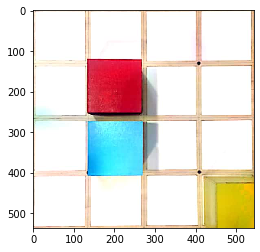

In [156]:
BGR_image = cv2.imread("one.jpg")
im = cv2.cvtColor(BGR_image, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [157]:
# function for segmentation of cubes
def mask(image):
    # mask of red  
    mask1 = cv2.inRange(image, (147, 0, 22), (239, 90, 124))

    # mask o yellow  
    mask2 = cv2.inRange(image, (162, 150, 0), (255, 239, 43))
    
    # mask o blue  
    mask3 = cv2.inRange(image, (0, 118, 181), (134, 255, 255))

    # final mask and masked
    mask = cv2.bitwise_or(mask1, mask2)
    total = cv2.bitwise_or(mask, mask3)

    target = cv2.bitwise_and(image,image, mask=total)
    
    return target

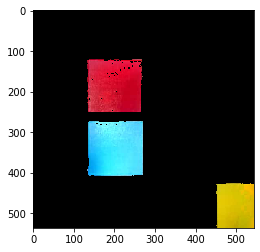

In [158]:
image = mask(im)
plt.imshow(image)

In [159]:
# THe following formats are not usable yet, they're utility for future functions

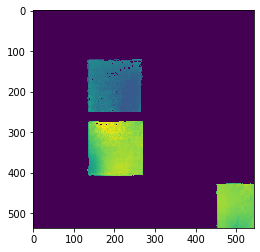

In [160]:
# gray image for masked image 
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

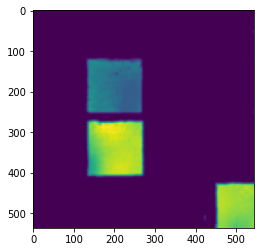

In [161]:
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
plt.imshow(blurred)

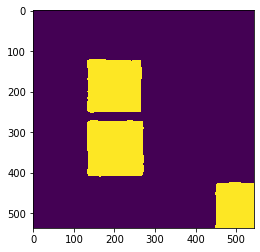

In [162]:
thresh = cv2.threshold(blurred, 40, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

In [163]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [164]:
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    if ( M["m00"] != 0 ):
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(cX,cY)

496 479
202 339
199 186
